In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('file.xlsx') #reading the file. I have renamed TRAFFIC_NYT_201.xlsx to file.xlsx
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Time EST,Counts Total EST,Counts EST,Counts EST.1,Num Articles EST
0,2011-12-31; 18:00-20:00,8,1,0,11
1,2011-12-31; 20:00-22:00,345,17,1,16
2,2011-12-31; 22:00-00:00,83,10,0,9
3,2012-01-01; 00:00-02:00,42,6,0,18
4,2012-01-01; 02:00-04:00,0,0,0,2


In [3]:
#get the shape of the dataframe
df.shape

(399, 5)

In [4]:
#get the column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Time EST          399 non-null    object
 1   Counts Total EST  399 non-null    int64 
 2   Counts EST        399 non-null    int64 
 3   Counts EST.1      399 non-null    int64 
 4   Num Articles EST  399 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [5]:
#check the null values
df.isnull().sum()

Time EST            0
Counts Total EST    0
Counts EST          0
Counts EST.1        0
Num Articles EST    0
dtype: int64

In [6]:
#Leave only the hours from the Time EST column
df['Time EST'] = df['Time EST'].apply(lambda x: x[12:])
df.head()

,Time EST,Counts Total EST,Counts EST,Counts EST.1,Num Articles EST
0,18:00-20:00,8,1,0,11
1,20:00-22:00,345,17,1,16
2,22:00-00:00,83,10,0,9
3,00:00-02:00,42,6,0,18
4,02:00-04:00,0,0,0,2


In [7]:
#group the df by Time EST column
df_grouped = df.groupby('Time EST').sum()
df_grouped

,Counts Total EST,Counts EST,Counts EST.1,Num Articles EST
Time EST,,,,
00:00-02:00,7762,186,24,373
02:00-04:00,3351,74,11,100
04:00-06:00,6208,162,27,236
06:00-08:00,6255,476,51,417
08:00-10:00,13116,652,61,646
10:00-12:00,25331,1078,125,934
12:00-14:00,22539,1237,124,1139
14:00-16:00,21933,1217,97,1181
16:00-18:00,17996,1049,89,1438


In [8]:
#x_axis
time_period = [name for name,group in df.groupby(['Time EST'])]

#y_features
Counts_Total_EST = df_grouped['Counts Total EST'].tolist()
Counts_EST = df_grouped['Counts EST'].tolist()
Counts_EST_1 = df_grouped['Counts EST.1'].tolist()
Num_Articles_EST = df_grouped['Num Articles EST'].tolist()

print(time_period,'\n')
print(Counts_Total_EST,'\n')
print(Counts_EST,'\n')
print(Counts_EST_1,'\n')
print(Num_Articles_EST,'\n')

['00:00-02:00', '02:00-04:00', '04:00-06:00', '06:00-08:00', '08:00-10:00', '10:00-12:00', '12:00-14:00', '14:00-16:00', '16:00-18:00', '18:00-20:00', '20:00-22:00', '22:00-00:00'] 

[7762, 3351, 6208, 6255, 13116, 25331, 22539, 21933, 17996, 13988, 48246, 20849] 

[186, 74, 162, 476, 652, 1078, 1237, 1217, 1049, 630, 1095, 601] 

[24, 11, 27, 51, 61, 125, 124, 97, 89, 69, 125, 51] 

[373, 100, 236, 417, 646, 934, 1139, 1181, 1438, 1211, 1481, 844] 



### Normal Bar Plot

In [9]:
'''#Select the graph style using plt.style.use(). You can see the available styles by typing plt.style.available.
# In this case we will use "fivethirtyeight"

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(14,6), facecolor='y')
x_indexes = np.arange(len(time_period))
width = .15

ax.bar(x_indexes,Counts_Total_EST, width=width,align='edge', label='Counts Total')
ax.bar(x_indexes+width,Counts_EST, color='red', width=width, align='edge', label='Counts_EST')
ax.bar(x_indexes-width, Counts_EST_1, color='gray', width=width, align='edge', label='Counts ETS 1')
ax.bar(x_indexes-(2*width),Num_Articles_EST, color='orange', width=width, align='edge', label='Num Articles')

ax.set_title('Bar Chart')
ax.set_yscale('log') # use logarithmic scale so that all the features become visible
ax.set_xlabel('Time Period')
ax.set_ylabel('Counts')

plt.xticks(ticks=x_indexes, labels=time_period, rotation=45)
plt.tight_layout()
plt.legend()
plt.show()
'''

'#Select the graph style using plt.style.use(). You can see the available styles by typing plt.style.available.\n# In this case we will use "fivethirtyeight"\n\nplt.style.use(\'fivethirtyeight\')\nfig, ax = plt.subplots(figsize=(14,6), facecolor=\'y\')\nx_indexes = np.arange(len(time_period))\nwidth = .15\n\nax.bar(x_indexes,Counts_Total_EST, width=width,align=\'edge\', label=\'Counts Total\')\nax.bar(x_indexes+width,Counts_EST, color=\'red\', width=width, align=\'edge\', label=\'Counts_EST\')\nax.bar(x_indexes-width, Counts_EST_1, color=\'gray\', width=width, align=\'edge\', label=\'Counts ETS 1\')\nax.bar(x_indexes-(2*width),Num_Articles_EST, color=\'orange\', width=width, align=\'edge\', label=\'Num Articles\')\n\nax.set_title(\'Bar Chart\')\nax.set_yscale(\'log\') # use logarithmic scale so that all the features become visible\nax.set_xlabel(\'Time Period\')\nax.set_ylabel(\'Counts\')\n\nplt.xticks(ticks=x_indexes, labels=time_period, rotation=45)\nplt.tight_layout()\nplt.legend()\

### Normal Bar Plot. Please scroll down to final cell

In [10]:
'''#Select the graph style using plt.style.use(). You can see the available styles by typing plt.style.available.
# In this case we will use "fivethirtyeight"

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(14,6), facecolor='y')
x_indexes = np.arange(len(time_period))
width = .15

bar_Count_Total_EST = ax.bar(x_indexes,Counts_Total_EST, width=width,align='edge', label='Counts Total')
bar_Count_EST = ax.bar(x_indexes+width,Counts_EST, color='red', width=width, align='edge', label='Counts_EST')
bar_Count_EST_1 = ax.bar(x_indexes-width, Counts_EST_1, color='gray', width=width, align='edge', label='Counts ETS 1')
bar_Num_Articles = ax.bar(x_indexes-(2*width),Num_Articles_EST, color='orange', width=width, align='edge', label='Num Articles')

#Displaying the value
for bar in bar_Count_Total_EST:
    yvalue = bar.get_height()
    plt.text(bar.get_x(), yvalue+.005, str(yvalue))
    
for bar in bar_Count_EST:
    yvalue = bar.get_height()
    plt.text(bar.get_x(), yvalue+.005, str(yvalue))
    
for bar in bar_Count_EST_1:
    yvalue = bar.get_height()
    plt.text(bar.get_x(), yvalue+.005, str(yvalue))

for bar in bar_Num_Articles:
    yvalue = bar.get_height()
    plt.text(bar.get_x(), yvalue+.005, str(yvalue))

ax.set_title('Bar Chart')
ax.set_yscale('log') # use logarithmic scale so that all the features become visible
ax.set_xlabel('Time Period')
ax.set_ylabel('Counts')

plt.xticks(ticks=x_indexes, labels=time_period, rotation=45)
plt.tight_layout()
plt.legend()
plt.show()'''

'#Select the graph style using plt.style.use(). You can see the available styles by typing plt.style.available.\n# In this case we will use "fivethirtyeight"\n\nplt.style.use(\'fivethirtyeight\')\nfig, ax = plt.subplots(figsize=(14,6), facecolor=\'y\')\nx_indexes = np.arange(len(time_period))\nwidth = .15\n\nbar_Count_Total_EST = ax.bar(x_indexes,Counts_Total_EST, width=width,align=\'edge\', label=\'Counts Total\')\nbar_Count_EST = ax.bar(x_indexes+width,Counts_EST, color=\'red\', width=width, align=\'edge\', label=\'Counts_EST\')\nbar_Count_EST_1 = ax.bar(x_indexes-width, Counts_EST_1, color=\'gray\', width=width, align=\'edge\', label=\'Counts ETS 1\')\nbar_Num_Articles = ax.bar(x_indexes-(2*width),Num_Articles_EST, color=\'orange\', width=width, align=\'edge\', label=\'Num Articles\')\n\n#Displaying the value\nfor bar in bar_Count_Total_EST:\n    yvalue = bar.get_height()\n    plt.text(bar.get_x(), yvalue+.005, str(yvalue))\n    \nfor bar in bar_Count_EST:\n    yvalue = bar.get_heig

### The Final Bar Plot

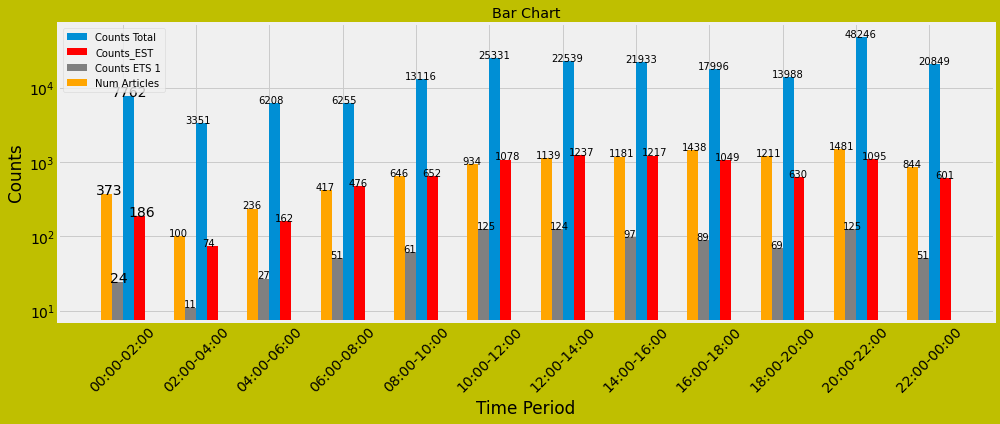

In [11]:
#Select the graph style using plt.style.use(). You can see the available styles by typing plt.style.available.
# In this case we will use "fivethirtyeight" style
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(14,6), facecolor='y')
x_indexes = np.arange(len(time_period))
width = .15
small_size= 10 #define the text size of the value above each bar

#We have assigned each barplot to a varible to access the attribute of the bar plot
bar_Count_Total_EST = ax.bar(x_indexes,Counts_Total_EST, width=width,align='edge', label='Counts Total')
bar_Count_EST = ax.bar(x_indexes+width,Counts_EST, color='red', width=width, align='edge', label='Counts_EST')
bar_Count_EST_1 = ax.bar(x_indexes-width, Counts_EST_1, color='gray', width=width, align='edge', label='Counts ETS 1')
bar_Num_Articles = ax.bar(x_indexes-(2*width),Num_Articles_EST, color='orange', width=width, align='edge', label='Num Articles')

#Displaying the value
for bar1,bar2,bar3,bar4 in zip(bar_Count_Total_EST,bar_Count_EST,bar_Count_EST_1,bar_Num_Articles): #iterate over each bar variable
    
    yval1 = bar1.get_height() # value of the bar_Count_Total_EST
    yval2 = bar2.get_height() # value of the bar_Count_EST
    yval3 = bar3.get_height() # value of the bar_Count_EST_1
    yval4 = bar4.get_height() # value of the bar_Num_Articles
    
    plt.text(bar1.get_x()-.15, yval1+.005, str(yval1)) # bar1.get_x() =  text position in x-axis, 
                                                       # yval1 = text position in x-axis
                                                       # str(yval1) = is the value in str format
                                                       # can customize the position using (+-)value after the 1st and 2nd argument
    plt.text(bar2.get_x()-.07, yval2-.05, str(yval2)) 
    plt.text(bar3.get_x()-.02, yval3+.005, str(yval3))
    plt.text(bar4.get_x()-.07, yval4+.05, str(yval4))
    
    plt.rc('font', size=small_size) #Customize the text size of the value above each bar

ax.set_title('Bar Chart')
ax.set_yscale('log') # use logarithmic scale so that all the features become visible
ax.set_xlabel('Time Period')
ax.set_ylabel('Counts')

plt.xticks(ticks=x_indexes, labels=time_period, rotation=45) # Replace the x_indexes by actual time_peroid
plt.tight_layout()
plt.legend()
plt.show()

### For a single feature

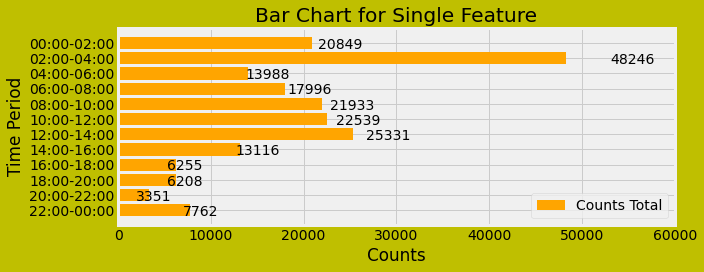

In [71]:
#Select the graph style using plt.style.use(). You can see the available styles by typing plt.style.available.
# In this case we will use "fivethirtyeight" style
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(10,4), facecolor='y')

bars = ax.barh(time_period, Counts_Total_EST, label='Counts Total', color='orange')

for bar in bars:
        width = bar.get_width()
        plt.text(1.15*bar.get_width(), bar.get_y()+0.30, int(width), ha='center', va='center')

ax.set_title('Bar Chart for Single Feature')
ax.set_ylabel('Time Period')
ax.set_xlabel('Counts')
ax.set_xlim(0,60000)

plt.tight_layout()
plt.legend()
plt.show()